This is the notebook where we will do our data analysis

In [21]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
options(repr.matrix.max.rows = 6)

In [22]:
knowledge <- read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", "Training_Data", range = "A1:F259")
knowledge

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


Some information about this dataset:
This dataset gives us insight into a person's degree of studying, including time,

STG (The degree of study time for goal object materails),
SCG (The degree of repetition number of user for goal object materails)
STR (The degree of study time of user for related objects with goal object)
LPR (The exam performance of user for related objects with goal object)
PEG (The exam performance of user for goal objects)
UNS (The knowledge level of user)

In [24]:
knowledge <- mutate(knowledge, class = as_factor(UNS)) |>
select(STG, SCG, PEG, class)
knowledge

STG,SCG,PEG,class
<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,very_low
0.08,0.08,0.90,High
0.06,0.06,0.33,Low
⋮,⋮,⋮,⋮
0.54,0.82,0.77,High
0.50,0.75,0.26,Middle
0.66,0.90,0.74,High


Our goal is to predict the class using STG, SCG and PEG.
The different possible classes are:
- very low
- low
- middle
- high

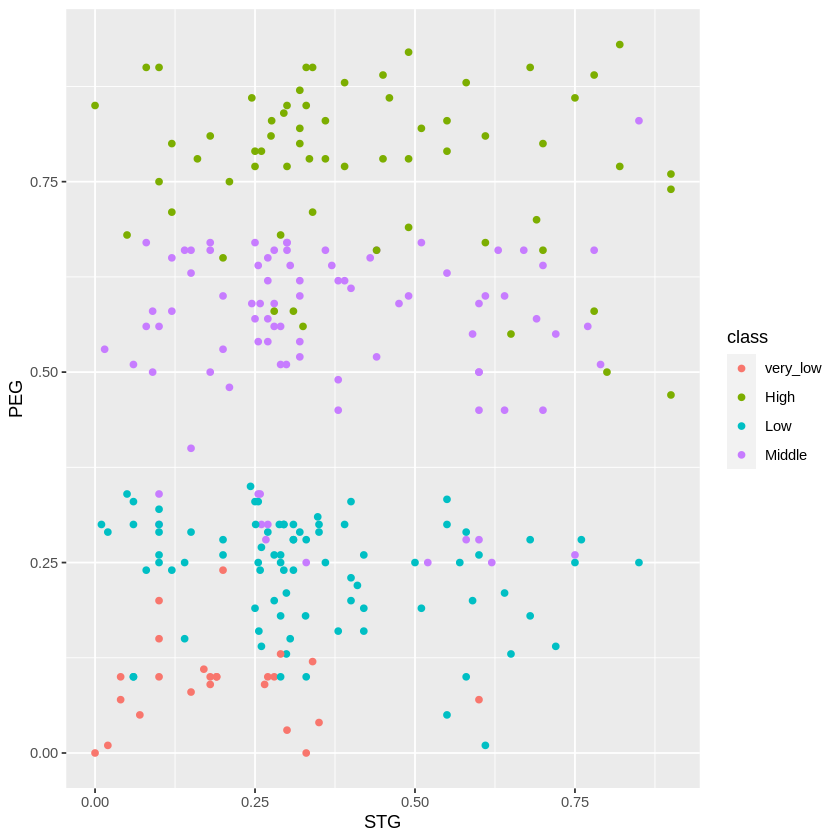

In [30]:
initial_plot <- ggplot(knowledge, aes(x= SCG, y= PEG, colour = class)) + 
                      geom_point() +
                      xlab("STG") +
                      ylab("PEG")
initial_plot